# Data Explore VN Index

## Import Data VN index


In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
import yfinance as yf

## Get VN index data from 2024-01-01 - 2024-06-01

In [3]:
vni = pd.read_excel('Lich_su_giao_dich_1.xlsx')
vni.head(7)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,1,2024-1-2,1131.72,1131.72,1.79,0.16,778092693,15859.89,64012774,1235.34,1136.39,1139.71,1128.69
1,2,2024-1-3,1144.17,1144.17,12.45,1.10,657568096,13104.71,58637762,1532.64,1130.53,1144.17,1128.32
2,3,2024-1-4,1150.72,1150.72,6.55,0.57,1141646899,24324.52,36205660,909.54,1145.49,1160.08,1144.32
3,4,2024-1-5,1154.68,1154.68,3.96,0.34,760268299,15395.13,42840029,900.04,1152.37,1155.84,1149.08
4,5,2024-1-8,1160.19,1160.19,5.51,0.48,814410599,17129.48,90997821,2071.86,1159.42,1162.56,1155.48
5,6,2024-1-9,1158.59,1158.59,-1.60,-0.14,799457699,16877.11,65207567,1428.54,1161.71,1162.83,1155.46
6,7,2024-1-10,1161.54,1161.54,2.95,0.25,936249400,19515.91,54617012,1164.71,1158.79,1166.10,1155.94


## Data Exploration Steps

### Check type


In [4]:
vni.dtypes

Index             int64
Date             object
CloseValue      float64
Adjust          float64
Change          float64
Change_pc       float64
Volumn_trade      int64
Value_trade     float64
Volumn_agr        int64
Value_agr       float64
OpenValue       float64
HighValue       float64
LowValue        float64
dtype: object

In [5]:
vni['Date'] = pd.to_datetime(vni['Date'])

In [6]:
vni.dtypes

Index                    int64
Date            datetime64[ns]
CloseValue             float64
Adjust                 float64
Change                 float64
Change_pc              float64
Volumn_trade             int64
Value_trade            float64
Volumn_agr               int64
Value_agr              float64
OpenValue              float64
HighValue              float64
LowValue               float64
dtype: object

### Check null 


In [7]:
null_count = vni.isnull().sum()
print(null_count)

Index           0
Date            0
CloseValue      0
Adjust          0
Change          0
Change_pc       0
Volumn_trade    0
Value_trade     0
Volumn_agr      0
Value_agr       0
OpenValue       0
HighValue       0
LowValue        0
dtype: int64


### Summary Statistics

In [8]:
vni.describe()

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
count,102.000000,102,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000
mean,51.500000,2024-03-19 00:42:21.176470528,1228.327255,1228.327255,1.513922,0.130196,8.346949e+08,19661.696176,7.915881e+07,1899.420196,1228.730490,1235.263137,1220.698039
min,1.000000,2024-01-02 00:00:00,1131.720000,1131.720000,-59.990000,-4.700000,4.891177e+08,11316.690000,0.000000e+00,0.000000,1130.530000,1139.710000,1128.320000
25%,26.250000,2024-02-06 06:00:00,1183.660000,1183.660000,-4.180000,-0.335000,6.694627e+08,15452.602500,5.122834e+07,1217.652500,1186.335000,1190.930000,1175.045000
50%,51.500000,2024-03-19 12:00:00,1242.870000,1242.870000,2.125000,0.180000,8.094548e+08,19434.565000,7.601854e+07,1842.215000,1244.645000,1251.125000,1233.525000
75%,76.750000,2024-04-24 18:00:00,1266.762500,1266.762500,8.675000,0.687500,9.553767e+08,22866.417500,1.088872e+08,2434.742500,1266.387500,1273.640000,1258.372500
max,102.000000,2024-06-05 00:00:00,1290.180000,1290.180000,28.210000,2.400000,1.616424e+09,40276.110000,2.470587e+08,7008.180000,1293.030000,1293.930000,1285.520000
std,29.588849,NaN,44.377693,44.377693,11.929034,0.960482,2.084173e+08,5323.849043,4.310840e+07,1101.281878,45.428165,45.296296,43.647563


### Rolling mean and Rolling standard 




In [9]:
#Short term - window size = 7 
vni['Sh_RM'] = vni['CloseValue'].rolling(window=7, center=True).mean()
vni['Sh_RS'] = vni['CloseValue'].rolling(window=7).std()
#Long term - window size = 30 
vni['Lg_RM'] = vni['CloseValue'].rolling(window=30, center=True).mean()
vni['Lg_RS'] = vni['CloseValue'].rolling(window=30).std()


In [10]:
vni.head(5)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue,Sh_RM,Sh_RS,Lg_RM,Lg_RS
0,1,2024-01-02,1131.72,1131.72,1.79,0.16,778092693,15859.89,64012774,1235.34,1136.39,1139.71,1128.69,NaN,NaN,NaN,NaN
1,2,2024-01-03,1144.17,1144.17,12.45,1.10,657568096,13104.71,58637762,1532.64,1130.53,1144.17,1128.32,NaN,NaN,NaN,NaN
2,3,2024-01-04,1150.72,1150.72,6.55,0.57,1141646899,24324.52,36205660,909.54,1145.49,1160.08,1144.32,NaN,NaN,NaN,NaN
3,4,2024-01-05,1154.68,1154.68,3.96,0.34,760268299,15395.13,42840029,900.04,1152.37,1155.84,1149.08,1151.658571,NaN,NaN,NaN
4,5,2024-01-08,1160.19,1160.19,5.51,0.48,814410599,17129.48,90997821,2071.86,1159.42,1162.56,1155.48,1156.015714,NaN,NaN,NaN


### Line chart


#### 1.Close, High, Low  

In [11]:
# import matplotlib.pyplot as plt

# # Plotting the opening prices by date
# plt.figure(figsize=(12, 6))
# plt.plot(vni['Date'], vni['OpenValue'], color='black', linewidth=2, label='Open')
# plt.plot(vni['Date'], vni['HighValue'], color='red', linewidth=2, label='High')
# plt.plot(vni['Date'], vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
# plt.plot(vni['Date'], vni['LowValue'], color='purple', linewidth=2, label='Low')
# plt.plot(vni['Date'], vni['Sh_RM'], color = 'maroon',linestyle = '--', linewidth = 2, label = 'Short term: Roll Mean')
# # plt.plot(vni['Date'], vni['Sh_RS'], color = 'darkred',linestyle = '--', linewidth = 2, label = 'Short term: Roll Std')
# plt.plot(vni['Date'], vni['Lg_RM'], color = 'teal',linestyle = '--', linewidth = 2, label = 'Long term: Roll Mean')
# # plt.plot(vni['Date'], vni['Lg_RM'], color = 'darkcyan',linestyle = '--', linewidth = 2, label = 'Long term: Roll Std')

# # Adding title and labels
# plt.title('VN-Index Opening Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Open Price')

# # Adding grid for better visualization
# # plt.grid(True)

# # Adding legend
# plt.legend()

# # Displaying the plot
# plt.show()


# f


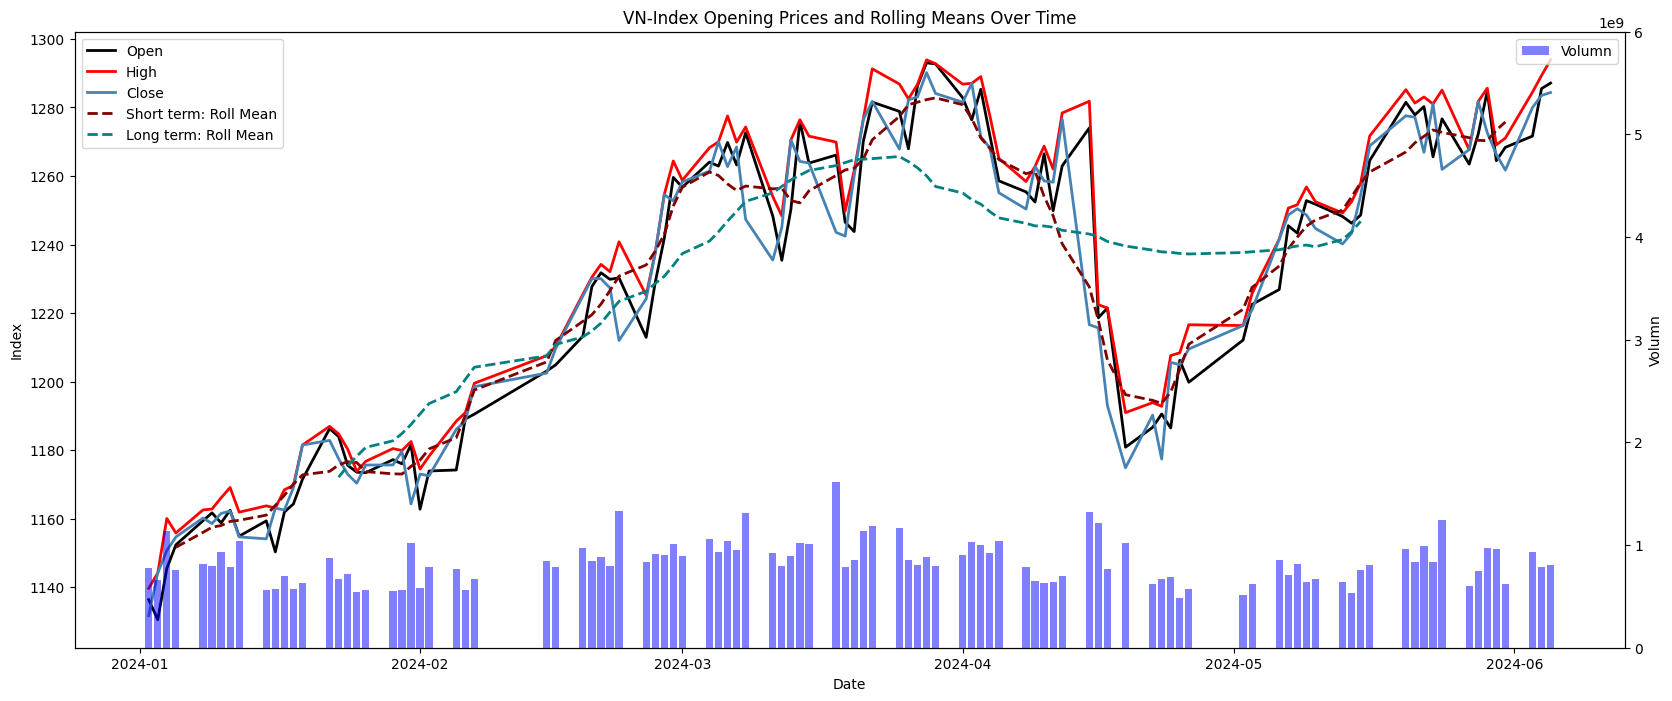

In [12]:
import matplotlib.dates as mdates

# create figure and primary Axes
fig, ax1 = plt.subplots(figsize=(20,8))

#plot the price values on the primary y-axis
ax1.plot(vni['Date'], vni['OpenValue'], color = 'black', linewidth = 2, label = 'Open')
ax1.plot(vni['Date'], vni['HighValue'], color='red', linewidth=2, label='High')
ax1.plot(vni['Date'], vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
## plot the rolling mean 
ax1.plot(vni['Date'], vni['Sh_RM'], color = 'maroon',linestyle = '--', linewidth = 2, label = 'Short term: Roll Mean')
ax1.plot(vni['Date'], vni['Lg_RM'], color = 'teal'  , linestyle = '--', linewidth = 2, label = 'Long term: Roll Mean')
## Adding label and title
ax1.set_title('VN-Index Opening Prices and Rolling Means Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index')

# Create a secondary y-axis for volumn values
ax2 = ax1.twinx()
ax2.bar(vni['Date'], vni['Volumn_trade'], color='blue', alpha = 0.5, label = 'Volumn')
ax2.set_ylabel('Volumn')
ax2.set_ylim(0,6.0*pow(10,9))
# Adding the legend for both 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



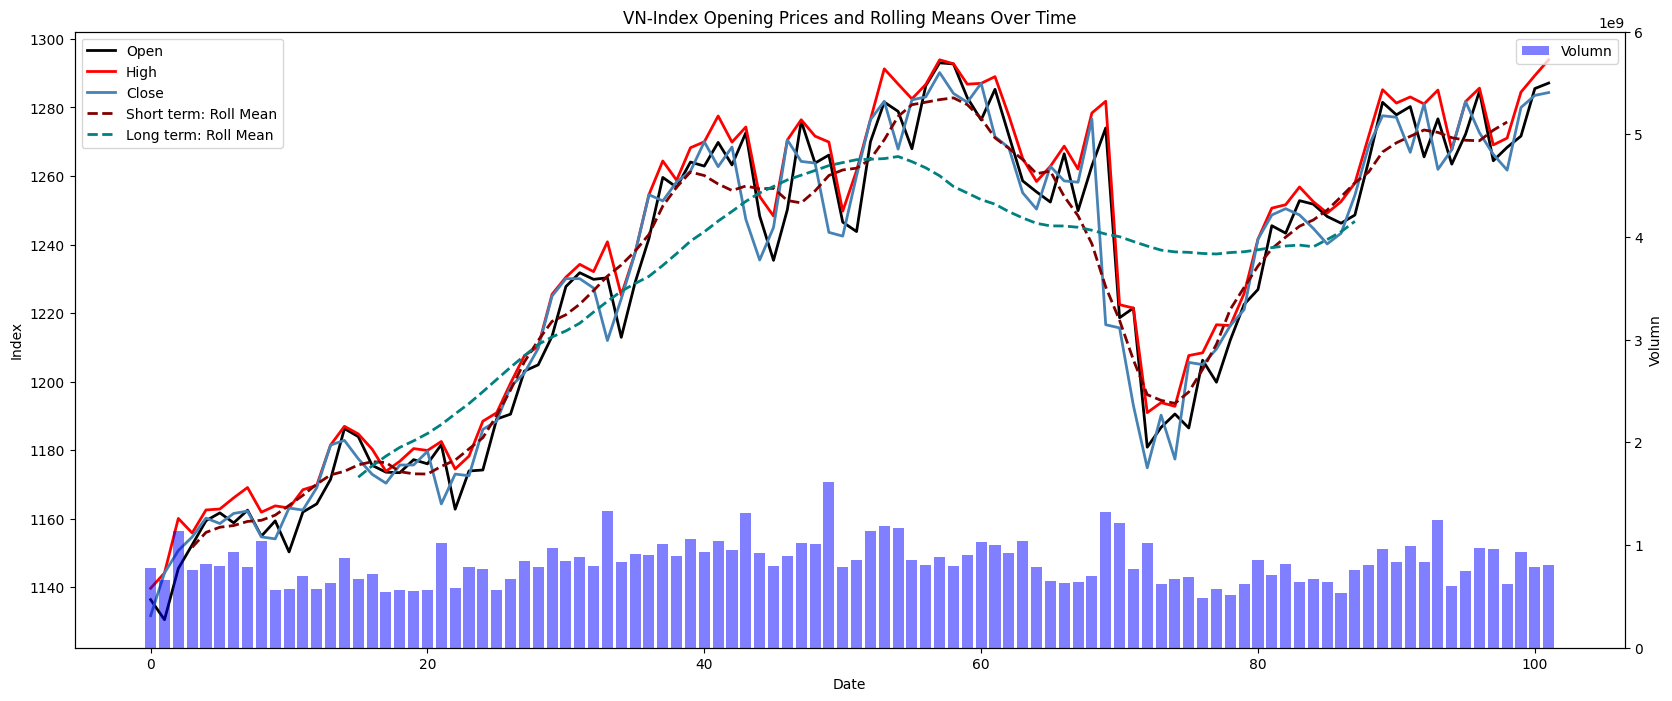

In [13]:
import matplotlib.dates as mdates

# create figure and primary Axes
fig, ax1 = plt.subplots(figsize=(20,8))

#plot the price values on the primary y-axis
ax1.plot(vni.index, vni['OpenValue'], color = 'black', linewidth = 2, label = 'Open')
ax1.plot(vni.index, vni['HighValue'], color='red', linewidth=2, label='High')
ax1.plot(vni.index, vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
## plot the rolling mean 
ax1.plot(vni.index, vni['Sh_RM'], color = 'maroon',linestyle = '--', linewidth = 2, label = 'Short term: Roll Mean')
ax1.plot(vni.index, vni['Lg_RM'], color = 'teal'  , linestyle = '--', linewidth = 2, label = 'Long term: Roll Mean')
## Adding label and title
ax1.set_title('VN-Index Opening Prices and Rolling Means Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index')

# Create a secondary y-axis for volumn values
ax2 = ax1.twinx()
ax2.bar(vni.index, vni['Volumn_trade'], color='blue', alpha = 0.5, label = 'Volumn')
ax2.set_ylabel('Volumn')
ax2.set_ylim(0,6.0*pow(10,9))
# Adding the legend for both 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



#### Thông tin:
- Trend ngắn hạn: uptrend
- Trend dài hạn: uptrend

#### 2. Rolling Standard 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

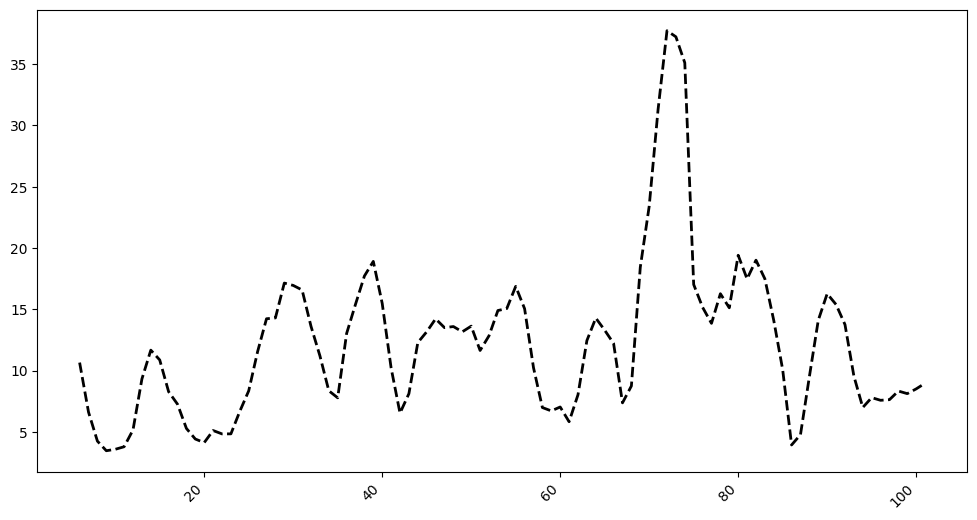

In [14]:
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.plot(vni.index, vni['Sh_RS'], color = 'black',linestyle = '--', linewidth = 2, label = 'Short term Rolling standard')
# ax1.plot(vni.index, vni['Lg_RS'], color = 'blue', linestyle = '--', linewidth = 2, label = 'Long term Rolling standard')
# Rotating date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

#### Thông tin:
- Có sự thay đổi mạnh về phương sai -> sử dụng họ các mô hình ARCH 


#### Decompose


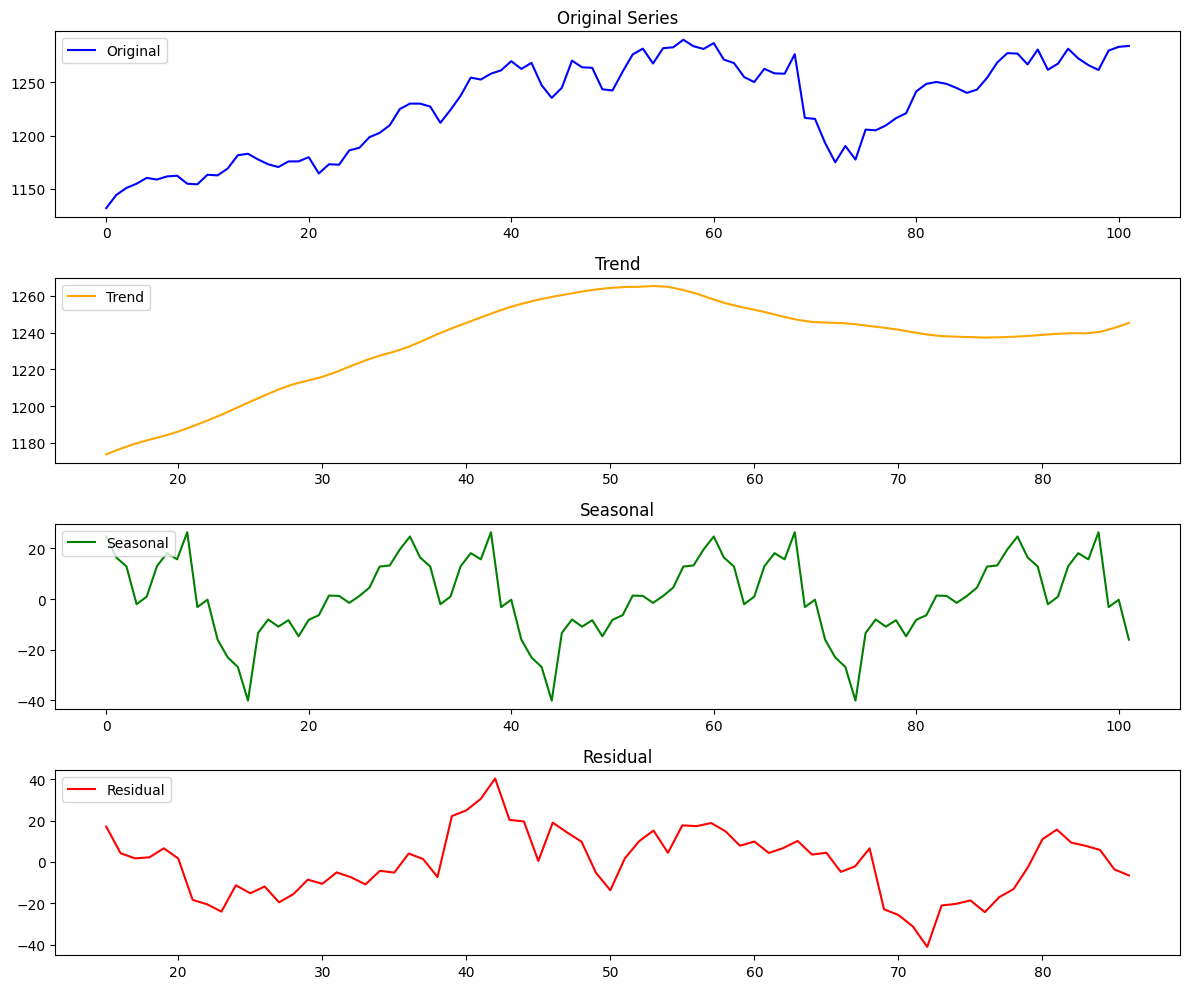

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your data is already loaded in the variable `vni`

# Decompose the 'CloseValue' column
decomposition = seasonal_decompose(vni['CloseValue'], model='additive', period=30)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(vni['CloseValue'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

result = adfuller(vni['CloseValue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.972498
p-value: 0.298761
Critical Values:
   1%: -3.4968181663902103
   5%: -2.8906107514600103
   10%: -2.5822770483285953


- Chuỗi thời gian không dừng 


In [17]:
vni_close_diff = vni['CloseValue'].diff().dropna()

In [18]:
vni['Close_Diff'] = vni['CloseValue'].diff().dropna()

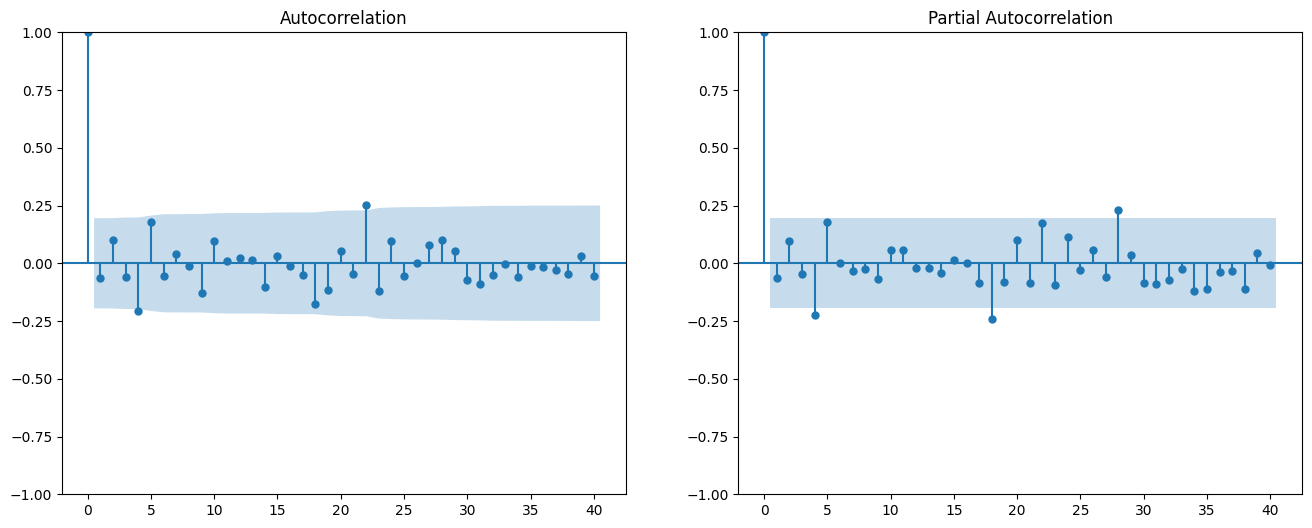

In [19]:

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig = sm.graphics.tsa.plot_acf(vni_close_diff, lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(vni_close_diff, lags=40, ax=ax[1])
plt.show()

- Bậc AR: 4,23
- Bậc MA: 4,18,27

In [20]:
import pandas as pd 
vni_2 = pd.read_excel('Lich_su_giao_dich_2.xlsx')

In [21]:
vni_2.head(30)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,1,2024-4-1,1281.52,1281.52,-2.57,-0.20,899388445,21563.56,62026535,1524.39,1282.84,1286.80,1274.09
1,2,2024-4-2,1287.04,1287.04,5.52,0.43,1031022100,25531.37,54516561,1953.65,1276.38,1287.04,1268.48
2,3,2024-4-3,1271.47,1271.47,-15.57,-1.21,995889194,25240.56,79863760,2116.20,1285.30,1288.99,1271.47
3,4,2024-4-4,1268.25,1268.25,-3.22,-0.25,921606498,22626.55,56434639,1160.35,1271.87,1277.62,1265.12
4,5,2024-4-5,1255.11,1255.11,-13.14,-1.04,1040744955,24434.52,31862243,703.25,1258.58,1265.14,1253.56
5,6,2024-4-8,1250.35,1250.35,-4.76,-0.38,790344900,18446.18,81699030,1872.21,1255.37,1258.40,1246.87
6,7,2024-4-9,1262.82,1262.82,12.47,1.00,648177200,15470.73,63387748,1546.61,1252.40,1262.82,1247.70
7,8,2024-4-10,1258.56,1258.56,-4.26,-0.34,633149400,15206.58,65055327,1548.68,1266.48,1268.72,1258.56
8,9,2024-4-11,1258.20,1258.20,-0.36,-0.03,642868552,15137.73,43901038,1406.15,1249.88,1262.03,1248.11
9,10,2024-4-12,1276.60,1276.60,18.40,1.46,696705294,17040.70,247058701,7008.18,1262.96,1278.39,1259.50


In [22]:
train = vni_2.iloc[:30]
test = vni_2.iloc[30:]

In [23]:
test.head(5)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
30,31,2024-05-20,1277.58,1277.58,8.80,0.69,957731071,23376.02,192734825,4045.90,1281.50,1285.19,1277.36
31,32,2024-05-21,1277.14,1277.14,-0.44,-0.03,838130935,20468.59,130472865,3345.23,1277.85,1281.29,1267.29
32,33,2024-05-22,1266.91,1266.91,-10.23,-0.80,987225260,24299.94,148279094,3656.29,1280.26,1283.06,1263.87
33,34,2024-05-23,1281.03,1281.03,14.12,1.11,833706141,20887.10,89676359,2024.95,1265.60,1281.03,1262.29
34,35,2024-05-24,1261.93,1261.93,-19.10,-1.49,1244899730,32414.29,122612331,3103.33,1276.68,1285.07,1250.28


In [24]:
train.head(5)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,1,2024-4-1,1281.52,1281.52,-2.57,-0.20,899388445,21563.56,62026535,1524.39,1282.84,1286.80,1274.09
1,2,2024-4-2,1287.04,1287.04,5.52,0.43,1031022100,25531.37,54516561,1953.65,1276.38,1287.04,1268.48
2,3,2024-4-3,1271.47,1271.47,-15.57,-1.21,995889194,25240.56,79863760,2116.20,1285.30,1288.99,1271.47
3,4,2024-4-4,1268.25,1268.25,-3.22,-0.25,921606498,22626.55,56434639,1160.35,1271.87,1277.62,1265.12
4,5,2024-4-5,1255.11,1255.11,-13.14,-1.04,1040744955,24434.52,31862243,703.25,1258.58,1265.14,1253.56


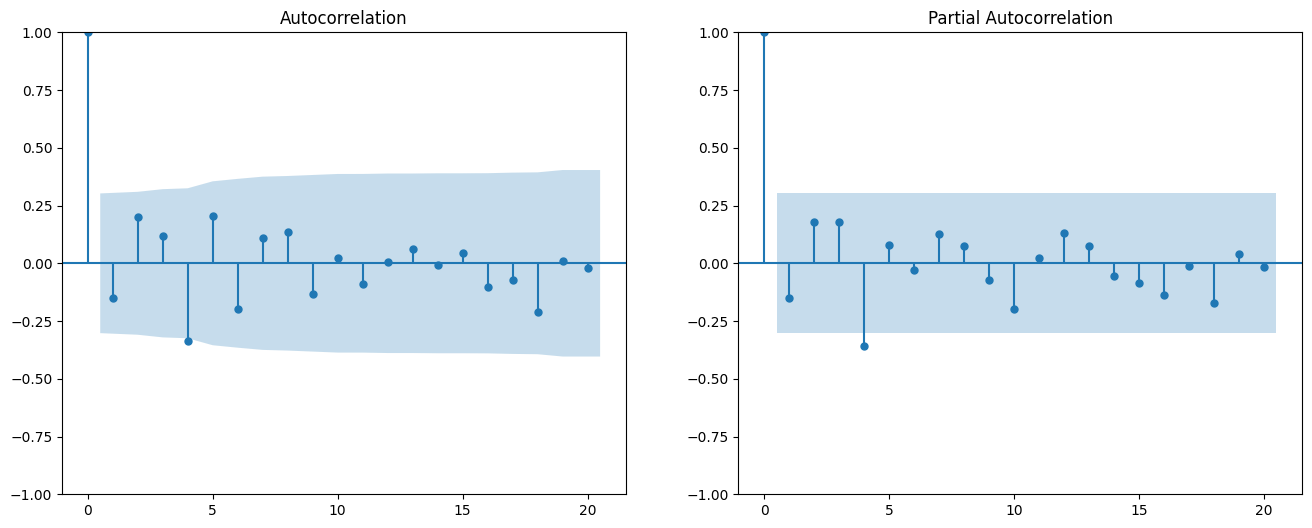

In [25]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig = sm.graphics.tsa.plot_acf(vni_2['CloseValue'].diff().dropna(), lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(vni_2['CloseValue'].diff().dropna(), lags=20, ax=ax[1])
plt.show()

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             CloseValue   No. Observations:                   30
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -113.619
Date:                Mon, 10 Jun 2024   AIC                            245.238
Time:                        19:29:27   BIC                            257.543
Sample:                             0   HQIC                           249.092
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1870      0.537     -0.348      0.728      -1.240       0.866
ar.L2          0.0556      0.391      0.142      0.887      -0.710       0.821
ar.L3         -0.1950      0.599     -0.326      0.7

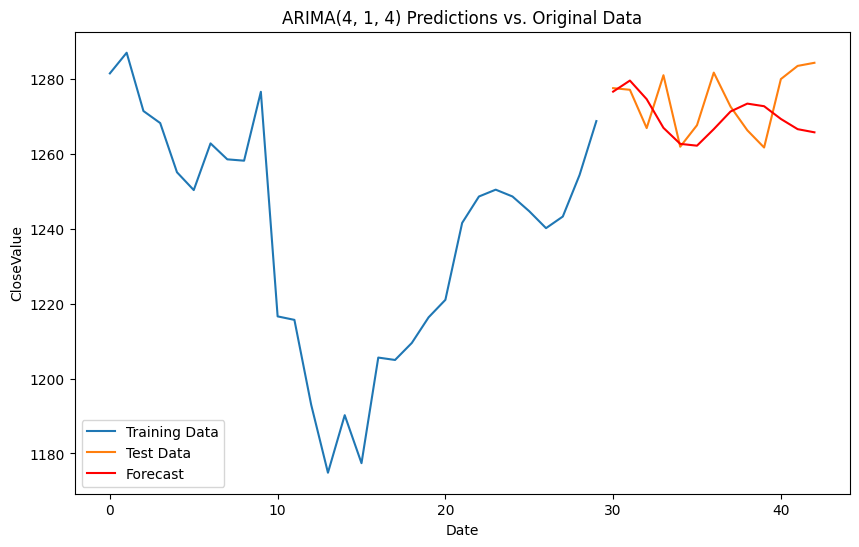

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming vni_2 is your DataFrame

# Convert the relevant columns to numeric and split the data into training and testing sets
train = pd.to_numeric(vni_2['CloseValue'].iloc[:30], errors='coerce').dropna()
test = pd.to_numeric(vni_2['CloseValue'].iloc[30:], errors='coerce').dropna()

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(4, 1, 4))
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

# Forecast values for the test set
n_forecast = len(test)
forecast = fitted_model.forecast(steps=n_forecast)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.title('ARIMA(4, 1, 4) Predictions vs. Original Data')
plt.xlabel('Date')
plt.ylabel('CloseValue')
plt.legend()
plt.show()


In [27]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
rmse = mse ** 0.5
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')


Test MSE: 110.84344931164651
Test RMSE: 10.528221564521072


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test, forecast)
rmse = mse ** 0.5
r2 = r2_score(test, forecast)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')


Test MSE: 110.84344931164651
Test RMSE: 10.528221564521072


In [29]:
import pandas as pd 
vni_2 = pd.read_excel('Lich_su_giao_dich_3.xlsx')
vni_2.head(5)

,Index,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,1,2024-04-22,1190.22,1190.22,15.37,1.31,616214281,13931.99,84365812,1886.92,1186.66,1193.88,1181.13
1,2,2024-04-23,1177.40,1177.40,-12.82,-1.08,672944408,15590.79,105178902,1892.80,1190.56,1192.80,1169.61
2,3,2024-04-24,1205.61,1205.61,28.21,2.40,691468850,16803.42,126780973,2993.78,1186.47,1207.61,1185.13
3,4,2024-04-25,1204.97,1204.97,-0.64,-0.05,489117744,12142.84,63595066,1776.62,1206.25,1208.41,1200.21
4,5,2024-04-26,1209.52,1209.52,4.55,0.38,574398922,14009.66,44327470,1433.39,1199.83,1216.60,1198.73


In [30]:
train = vni_2.iloc[:28]
test = vni_2.iloc[28:]

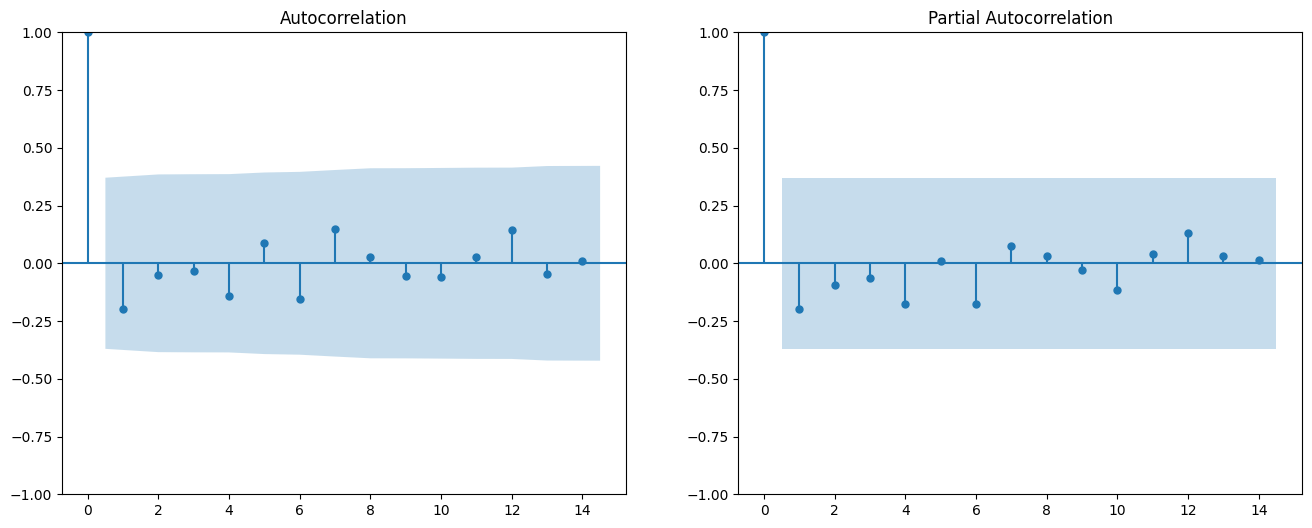

In [31]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig = sm.graphics.tsa.plot_acf(vni_2['CloseValue'].diff().dropna(), lags=14, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(vni_2['CloseValue'].diff().dropna(), lags=14, ax=ax[1])
plt.show()

In [32]:

# Convert the relevant columns to numeric and split the data into training and testing sets
train = pd.to_numeric(vni_2['CloseValue'].iloc[:25], errors='coerce').dropna()
test = pd.to_numeric(vni_2['CloseValue'].iloc[25:], errors='coerce').dropna()
len(test)

4

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:             CloseValue   No. Observations:                   25
Model:                 ARIMA(6, 1, 4)   Log Likelihood                 -89.292
Date:                Mon, 10 Jun 2024   AIC                            200.584
Time:                        19:29:28   BIC                            213.542
Sample:                             0   HQIC                           204.022
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3726      3.030      0.123      0.902      -5.566       6.311
ar.L2          0.4781      3.995      0.120      0.905      -7.351       8.307
ar.L3         -0.4213      2.481     -0.170      0.8

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


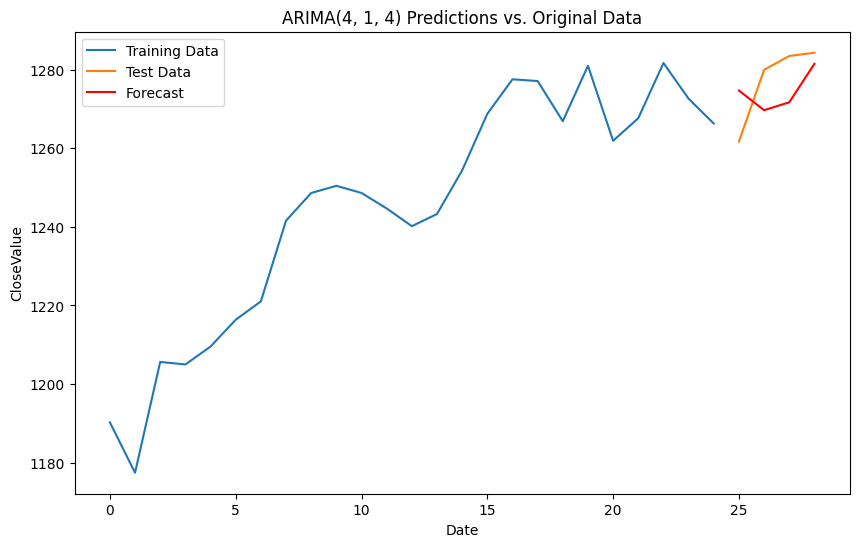

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming vni_2 is your DataFrame
   

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(6,1,4))
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

# Forecast values for the test set
n_forecast = len(test)
forecast = fitted_model.forecast(steps=n_forecast)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.title('ARIMA(4, 1, 4) Predictions vs. Original Data')
plt.xlabel('Date')
plt.ylabel('CloseValue')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test, forecast)
rmse = mse ** 0.5
r2 = r2_score(test, forecast)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')

Test MSE: 105.44403924333672
Test RMSE: 10.268594803737107
